In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from PIL import Image
from pathlib import Path
import warnings

plt.rcParams['axes.axisbelow'] = True

$$ 
u_t + c u_x = 0, \ c = 1 \\ 
u(x,0) = \varphi(x) \\ 
u(0,t) = 0 \\ 
0 < x < 2 \\ 
0 < t < 100\tau \\ 
$$

In [50]:
a = 0.4
b = 0.6
c = 1

def phi(r):
    return np.piecewise(r, 
                        [r <= a, (r > a) & (r < b), r >= b], 
                        [lambda r: 0.,  
                        lambda r: np.sqrt(1 - 100 * np.pow((r - 0.5), 2 )),
                        lambda r: 0.])

def u_analyt(r, t):
    return phi(r - c*t)

def vanLeerCriterion(u1, u2, u):
    return np.min(u1, u2) <= u and np.max(u1, u2) >= u

def solveTransfer(coeffs, plot_title, plot_comm, r_min = 0.0, r_max = 2.0, I = 200, CFL = 0.25, alt_coeffs_1 = np.zeros(4), alt_coeffs_2 = np.zeros(4)):
    h = (r_max - r_min) / I
    r_i = np.array([r_min + iter * h for iter in range(I)])
    tau = CFL * h / c
    num_time_steps = 100
    T = tau * num_time_steps
    t_i = np.linspace(0., T, num_time_steps)
    u = np.zeros((t_i.size, r_i.size))
    u[0, :] = phi(r_i)
    u[1, :] = u_analyt(r_i, tau)

    for n in range(1, t_i.size - 1):
        if alt_coeffs_1.any():
            for m in range(1, I - 1):
                # Порядок коэффициентов (0,0), (-1, 0), (-1, -1), (1, -1) в терминах mu, nu
                u[n + 1, m] =  coeffs[0] * u[n, m] + coeffs[1] * u[n, m - 1] + coeffs[2] * u[n - 1, m - 1] + coeffs[3] * u[n - 1, m + 1]
                if not vanLeerCriterion(u[n, m], u[n - 1, m - 1], u[n + 1, m]):
                    u[n + 1, m] =  alt_coeffs_1[0] * u[n, m] + alt_coeffs_1[1] * u[n, m - 1] + alt_coeffs_1[2] * u[n - 1, m - 1] + alt_coeffs_1[3] * u[n - 1, m + 1]
                if (not vanLeerCriterion(u[n, m], u[n - 1, m - 1], u[n + 1, m])) and alt_coeffs_2.any():
                    u[n + 1, m] =  alt_coeffs_2[0] * u[n, m] + alt_coeffs_2[1] * u[n, m - 1] + alt_coeffs_2[2] * u[n - 1, m - 1] + alt_coeffs_2[3] * u[n - 1, m + 1]
            u[n + 1, 0] = u[n + 1, 1]
            u[n + 1, -1] = u[n + 1, -2]
        else:
            for m in range(1, I - 1):
                # Порядок коэффициентов (0,0), (-1, 0), (-1, -1), (1, -1) в терминах mu, nu
                u[n + 1, m] =  coeffs[0] * u[n, m] + coeffs[1] * u[n, m - 1] + coeffs[2] * u[n - 1, m - 1] + coeffs[3] * u[n - 1, m + 1]
            u[n + 1, 0] = u[n + 1, 1]
            u[n + 1, -1] = u[n + 1, -2]

    u_true = u_analyt(r_i, T)

    plt.figure(figsize=(10, 6), dpi= 250)
    plt.plot(r_i, u[-1,:], label= plot_comm, c = 'red')
    plt.plot(r_i, u_true, label= 'Аналитическое решение', c = 'black')
    plt.legend(loc = 'best')
    plt.title(f'График численного и аналитического решения уравнения переноса\nt = {T}', fontsize=14)
    plt.grid(which='major', linestyle='-')
    plt.grid(which='minor', linestyle='--')
    plt.minorticks_on()
    plt.xlim((0.25, 1.5))
    plt.savefig(plot_title + '.png', 
        transparent = False,  
        facecolor = 'white'
    )
    return u, r_i, t_i

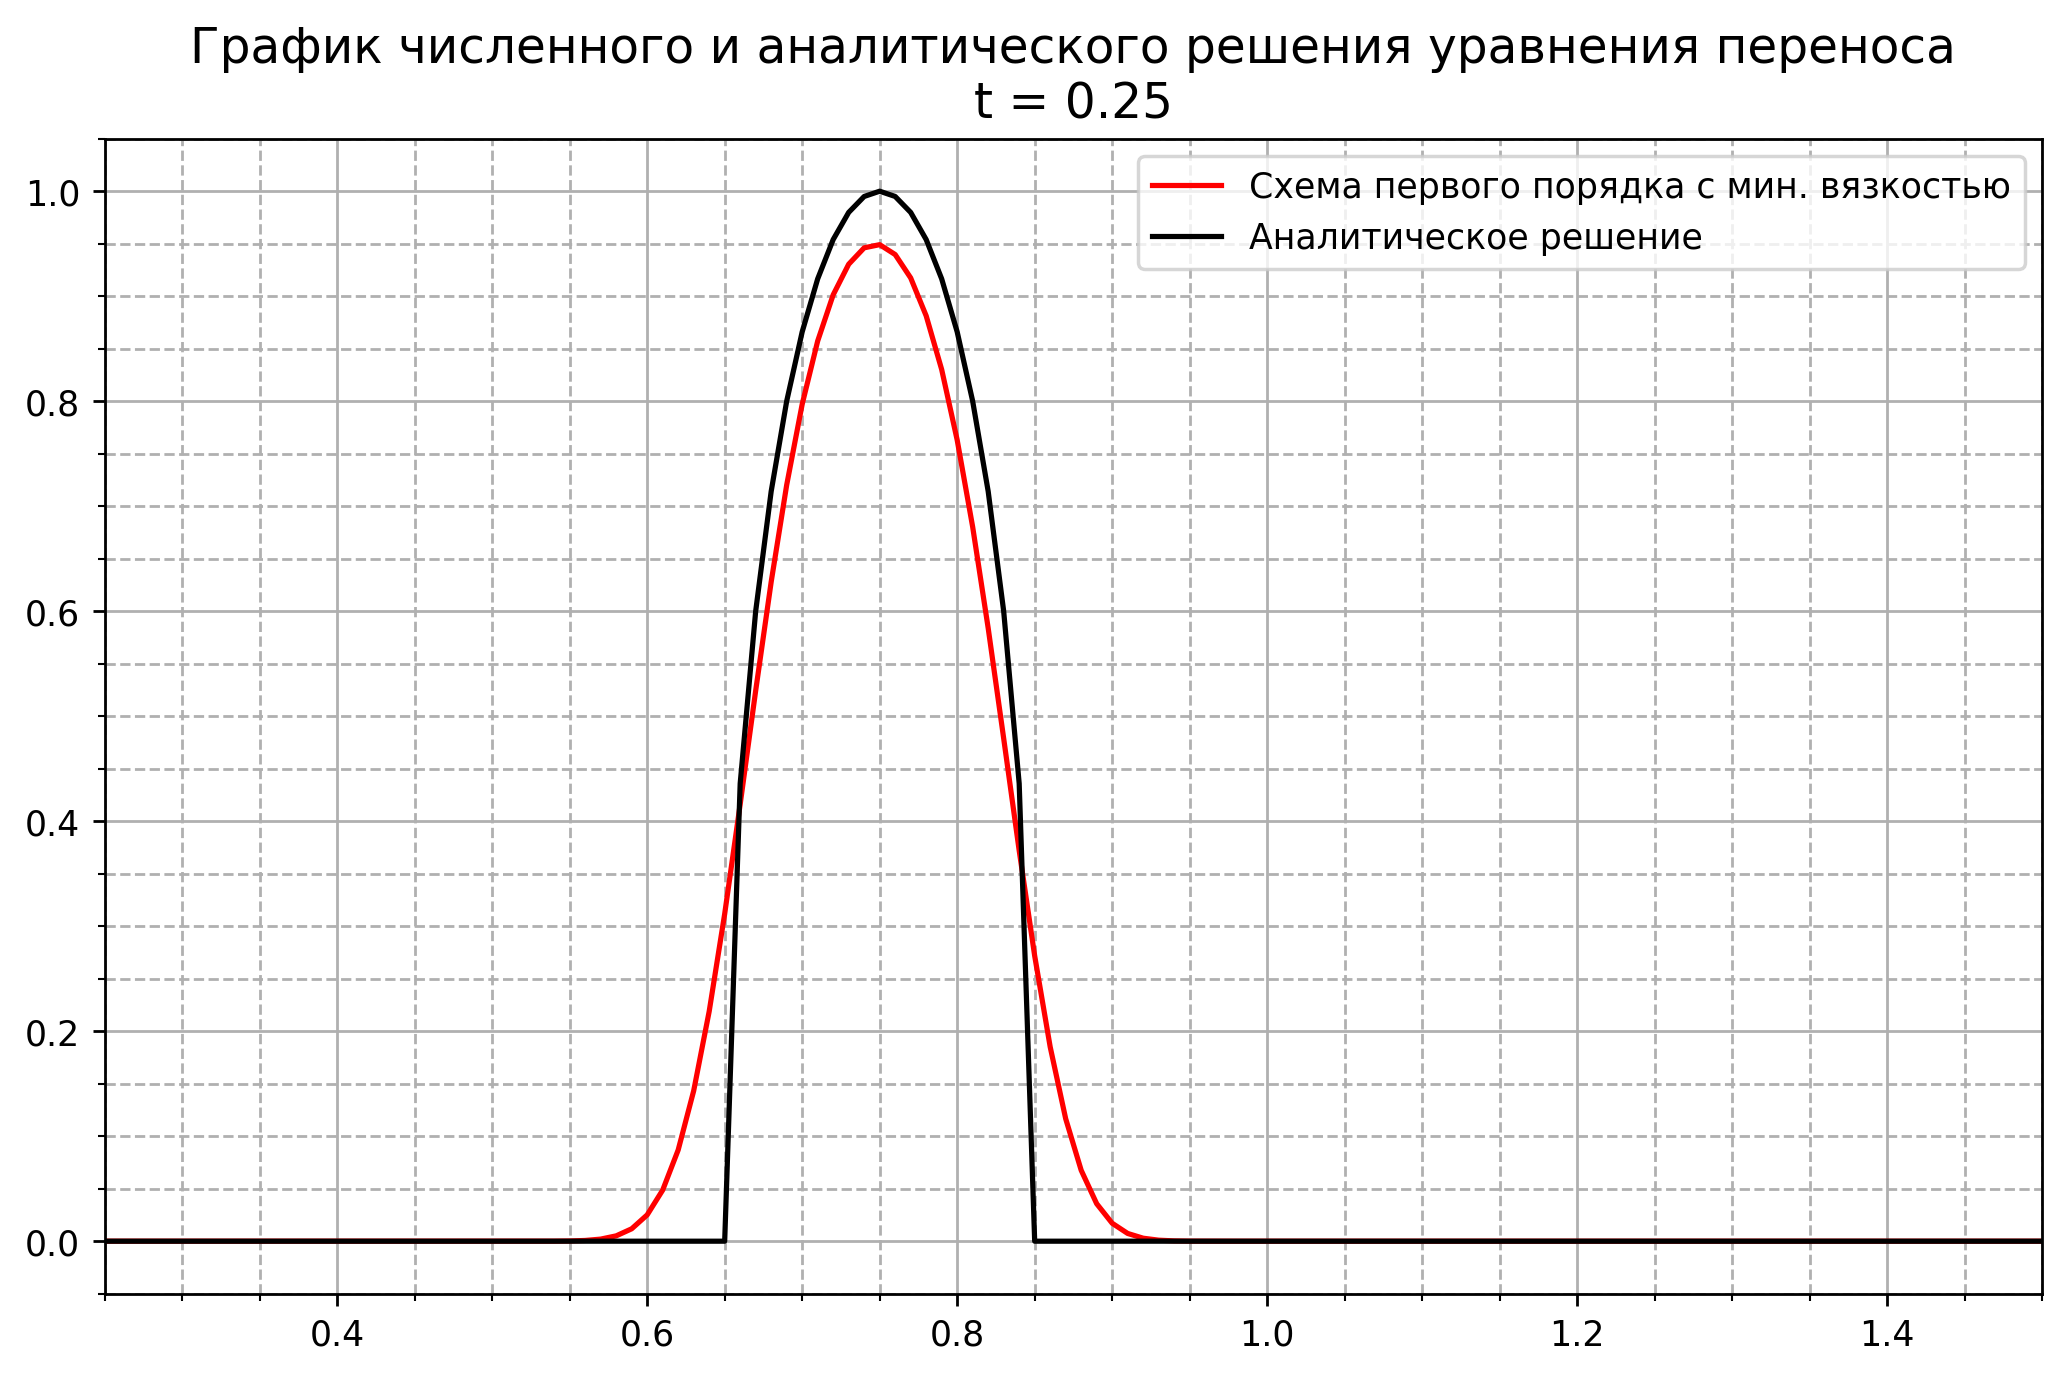

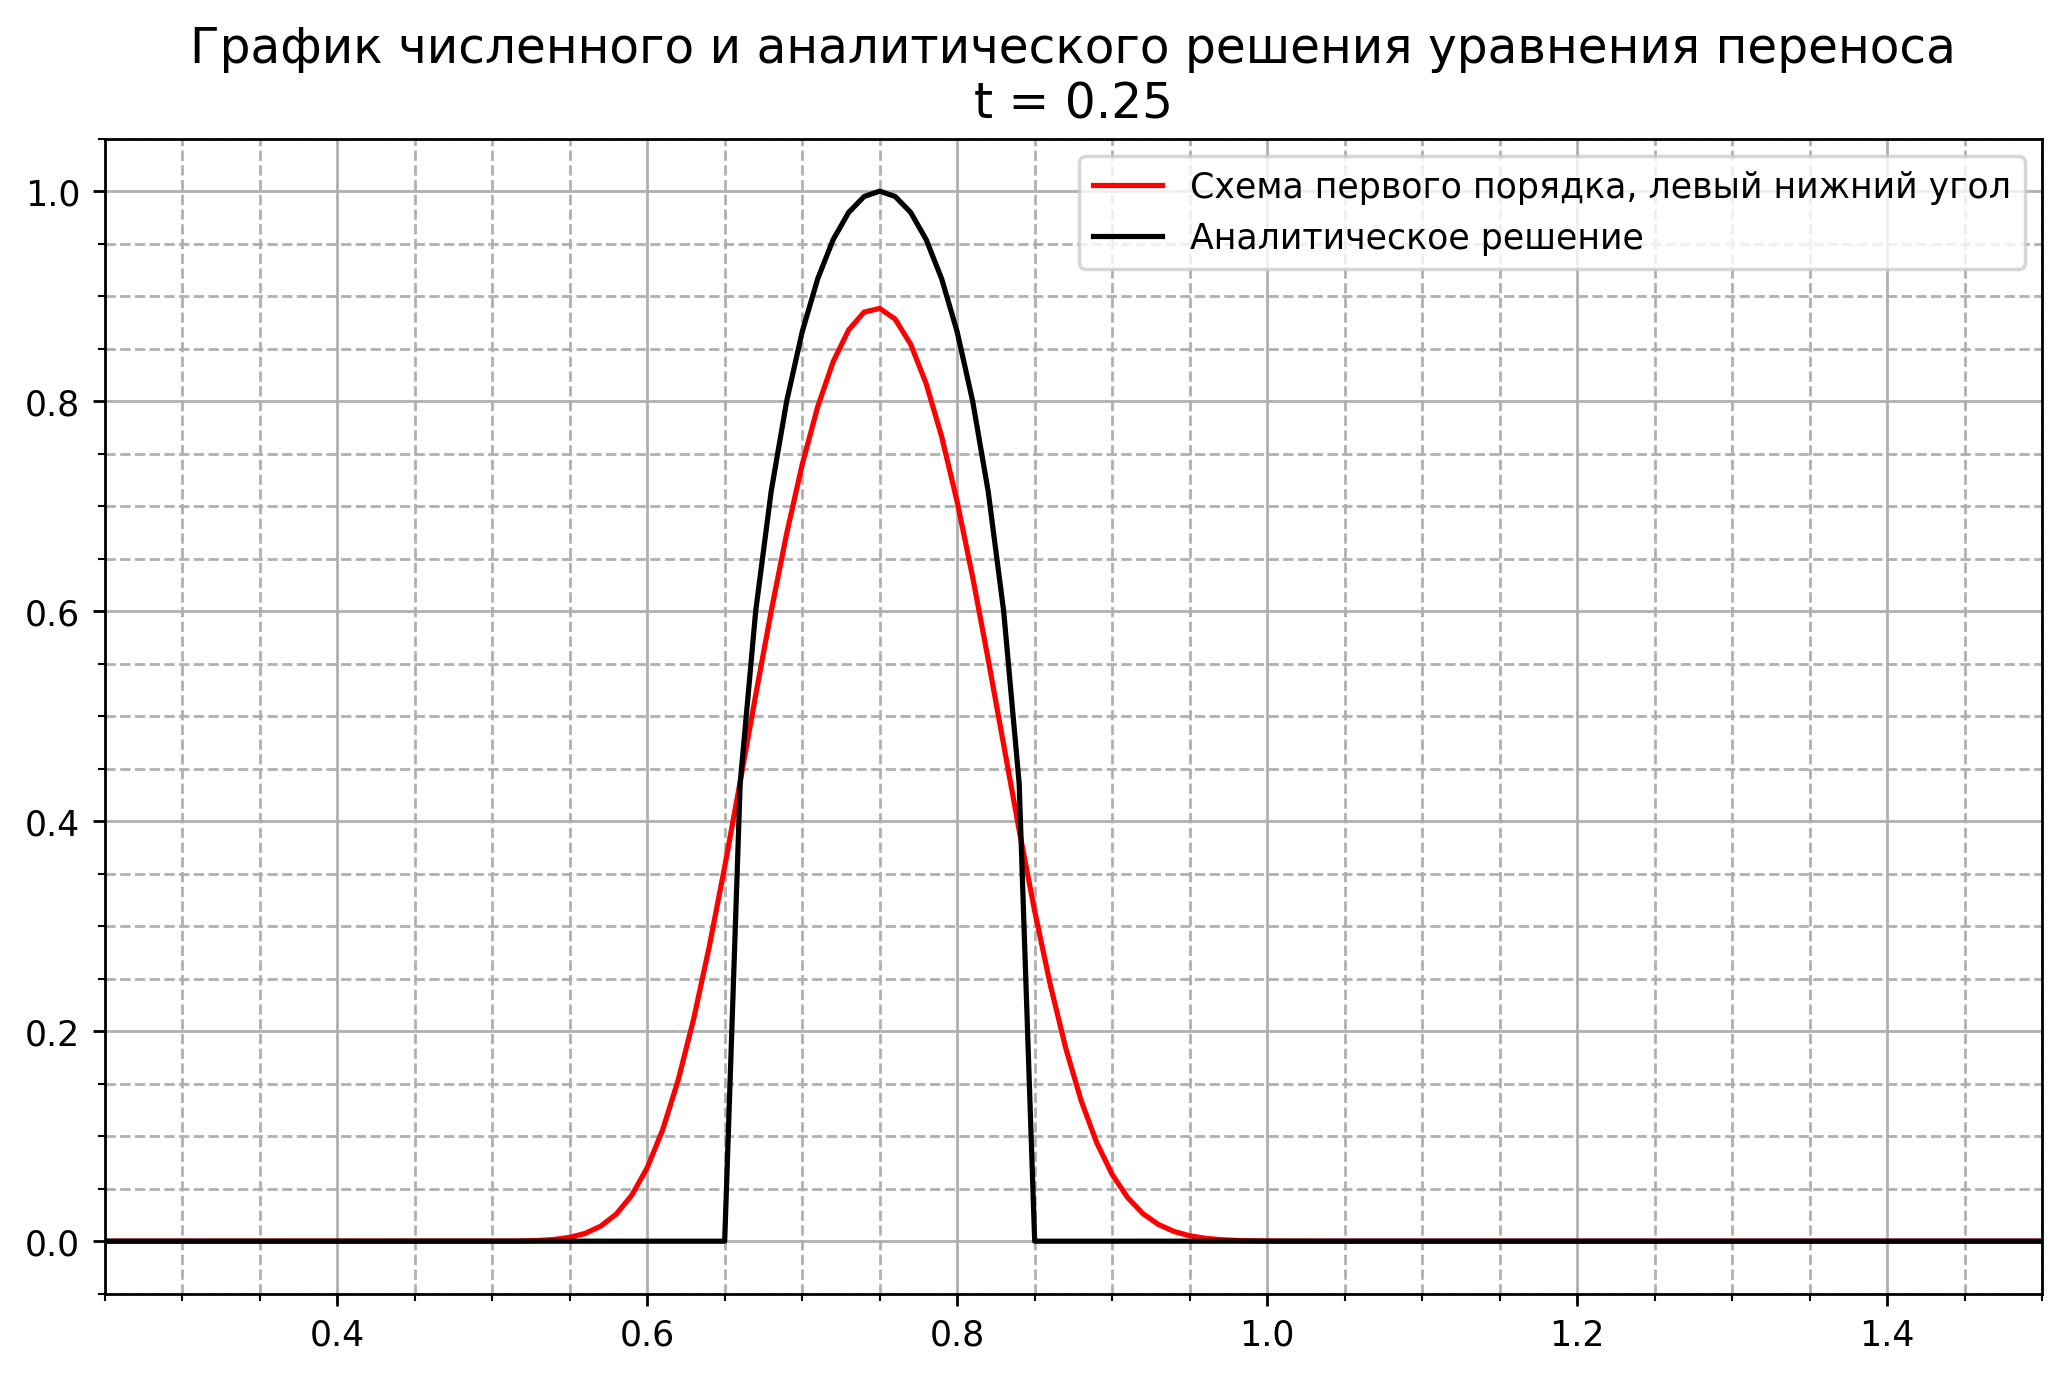

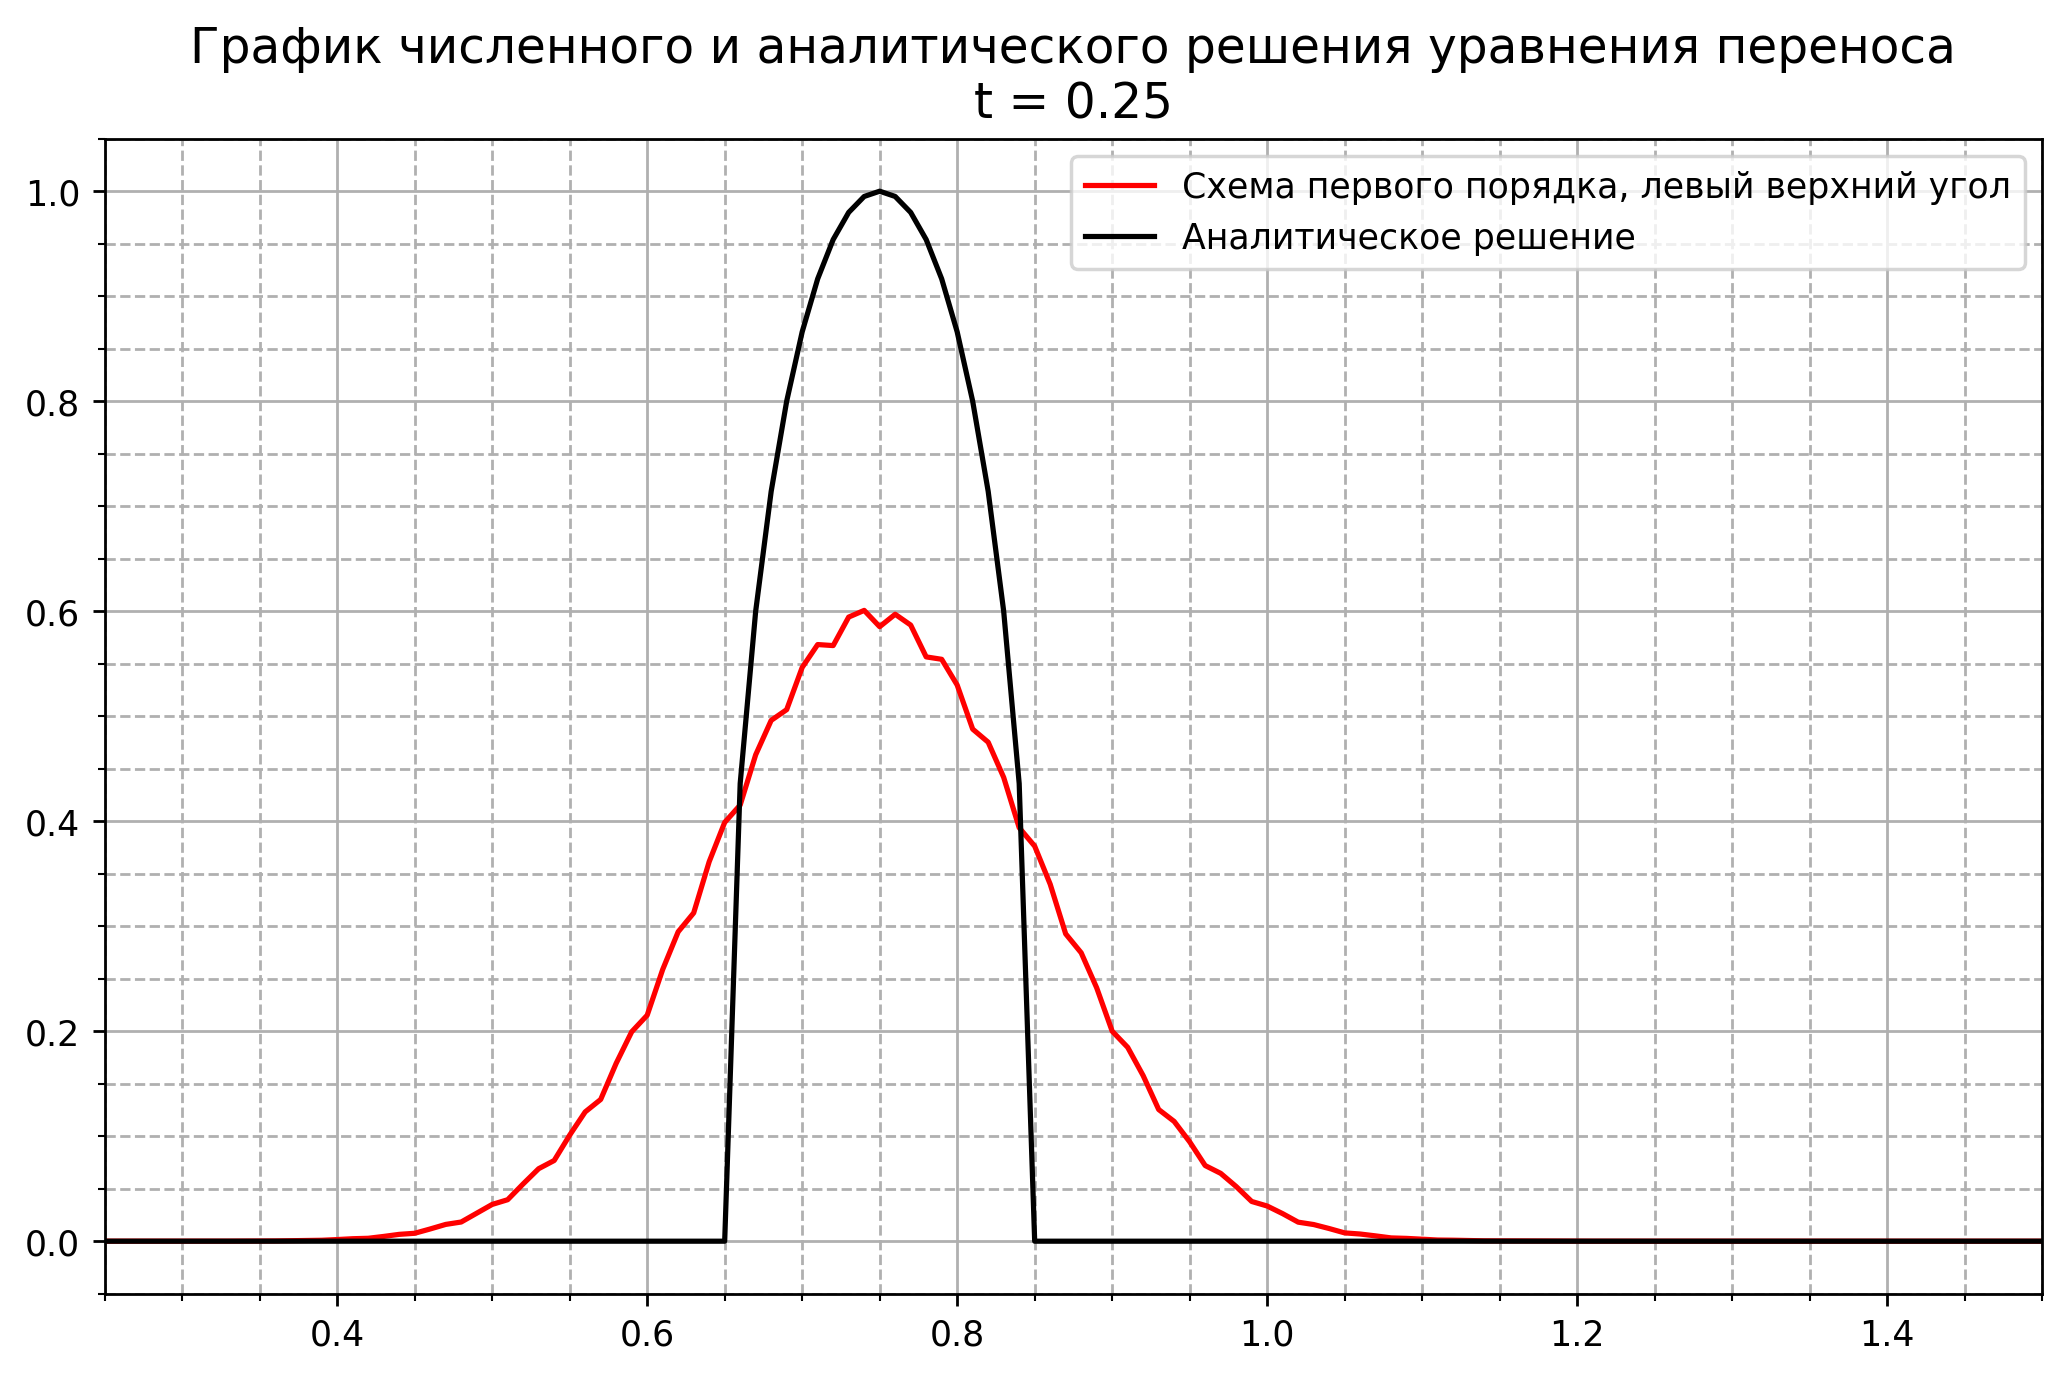

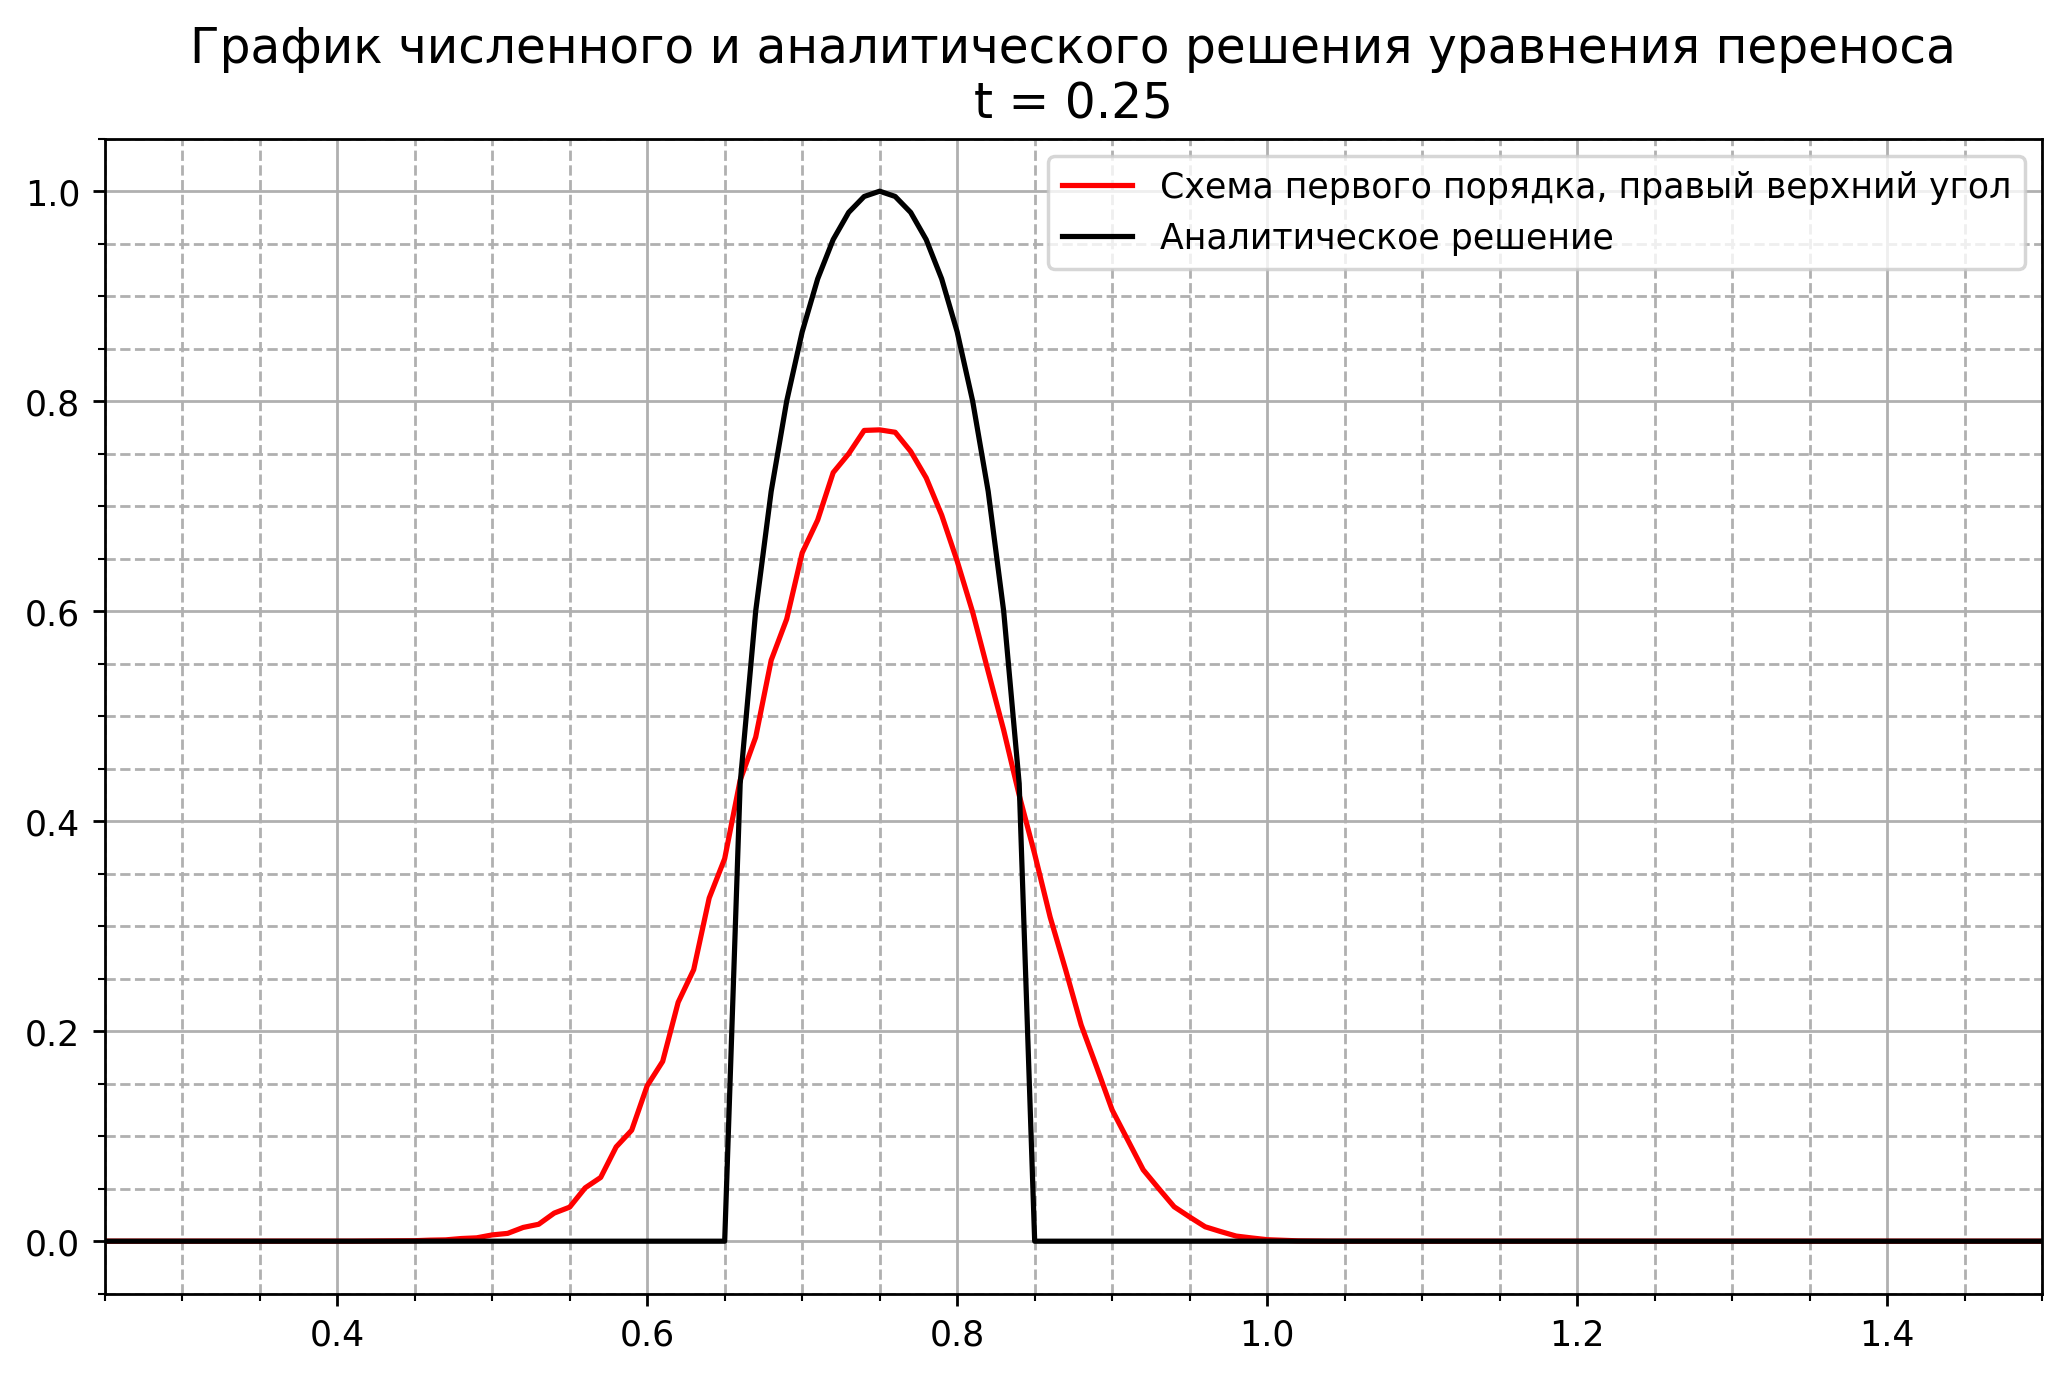

In [ ]:
solveTransfer([2. / 3, 0, 1. / 3, 0], '1_ord_min_vyask', 'Схема первого порядка с мин. вязкостью')
solveTransfer([3. / 4, 1. / 4, 0, 0], '1_ord_lower_left', 'Схема первого порядка, левый нижний угол')
solveTransfer([0, 2. / 3, 0, 1. / 3], '1_ord_upper_left', 'Схема первого порядка, левый верхний угол')
solveTransfer([0, 0, 0.75, 0.25], '1_ord_upper_right', 'Схема первого порядка, правый верхний угол')
print()

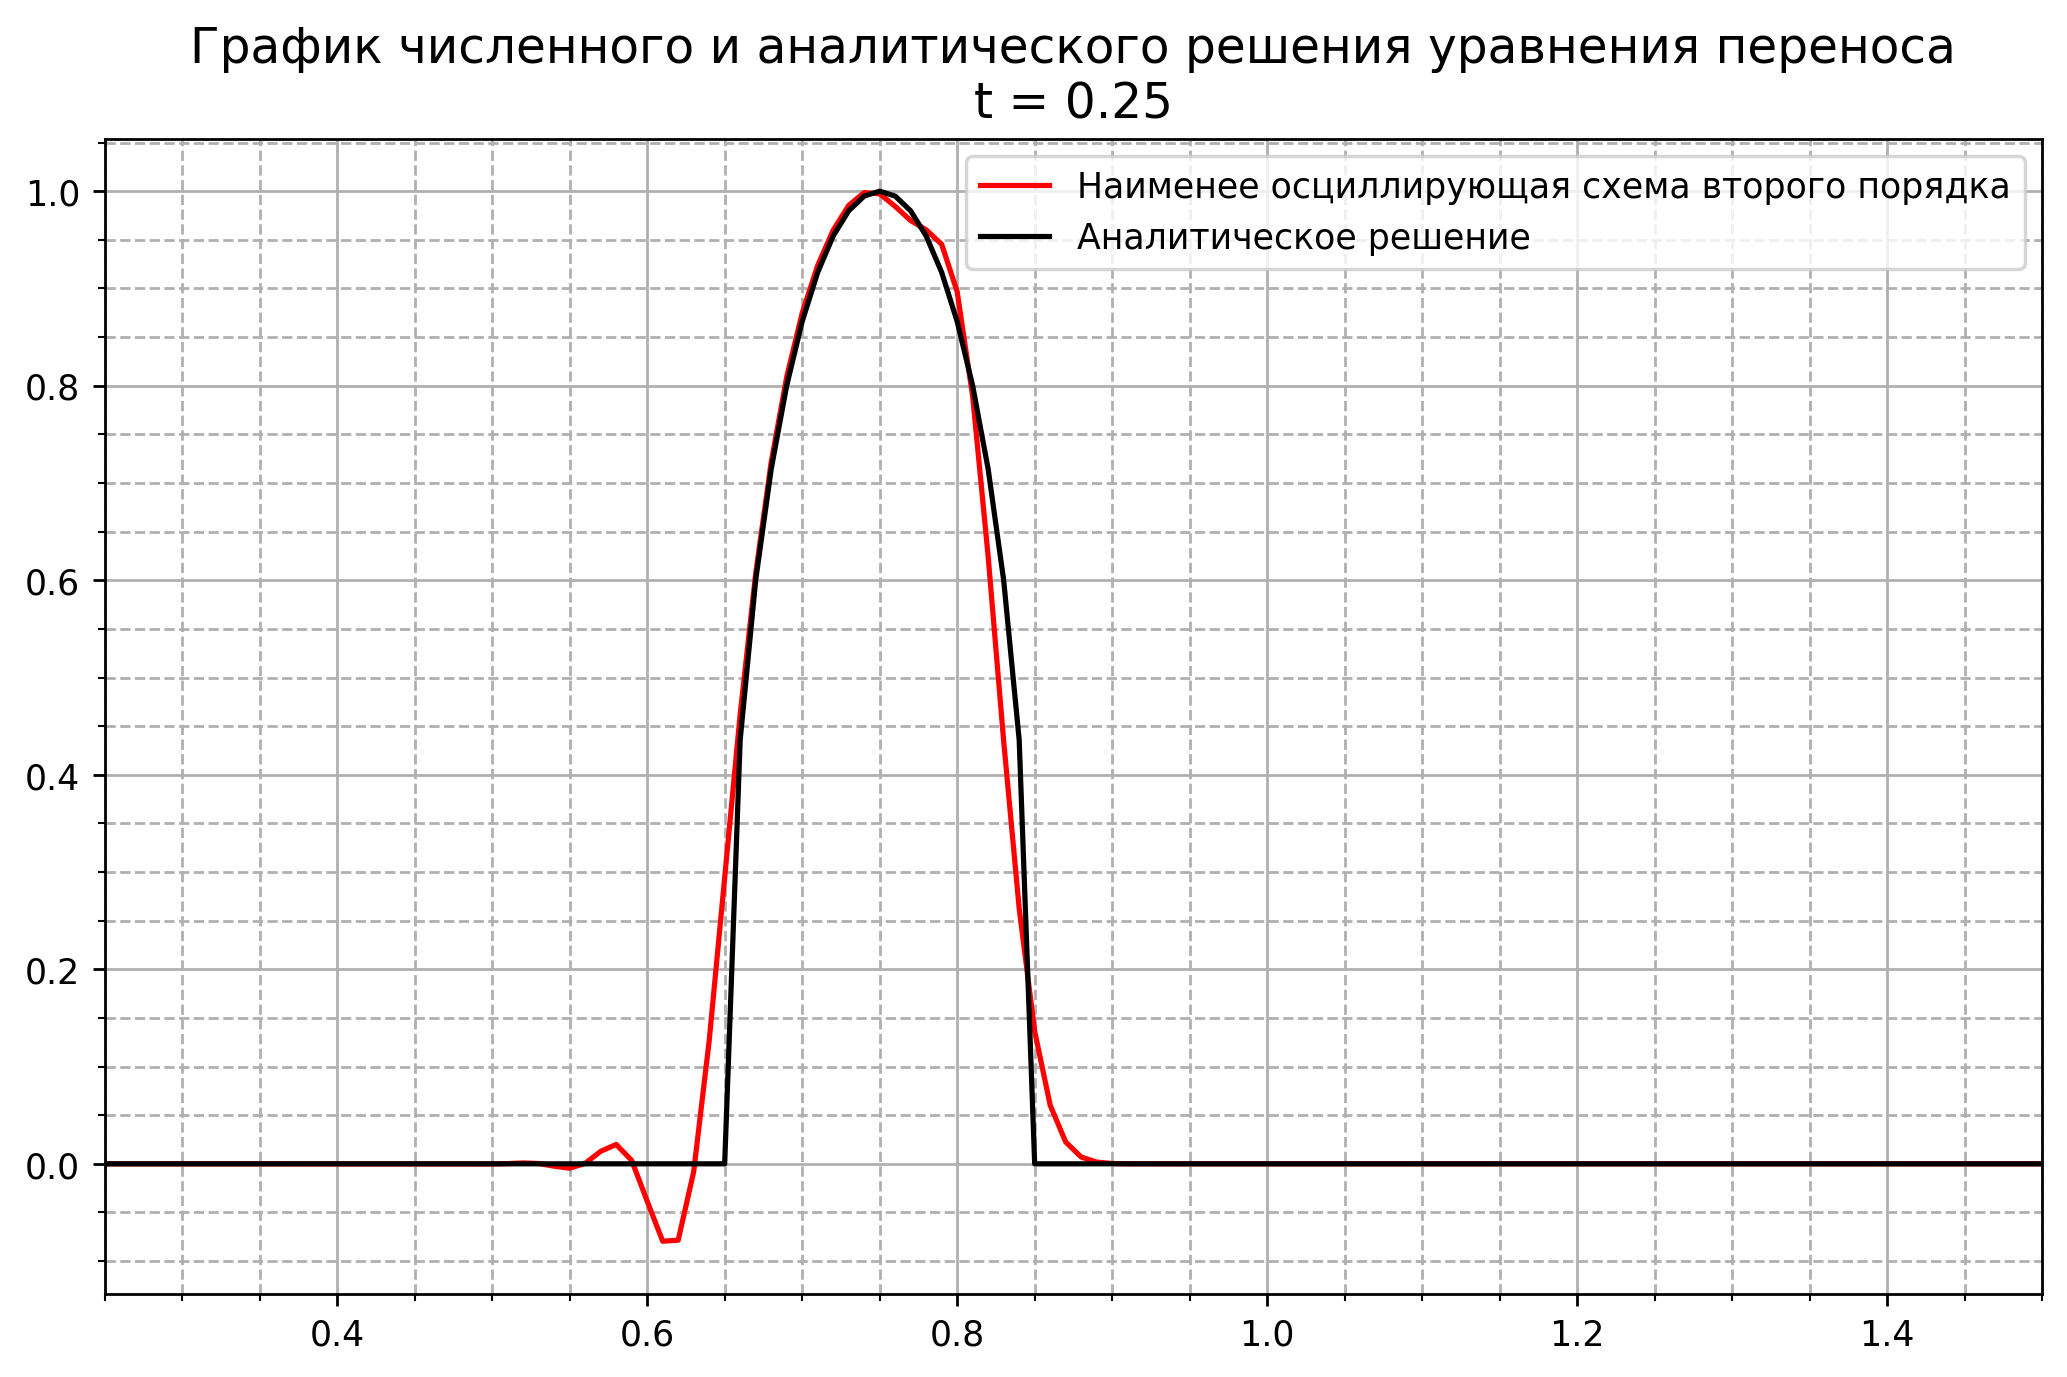

In [43]:
a1 = -38./(113*4) + 45./(4*113) + 0.75
a2 = -(3*38./(4*113)) - 25./(4*113) + 0.25
a3 = 38./113
a4 = -5./113

solveTransfer([a1, a2, a3, a4], '2_ord_best', 'Наименее осциллирующая схема второго порядка',)
print()

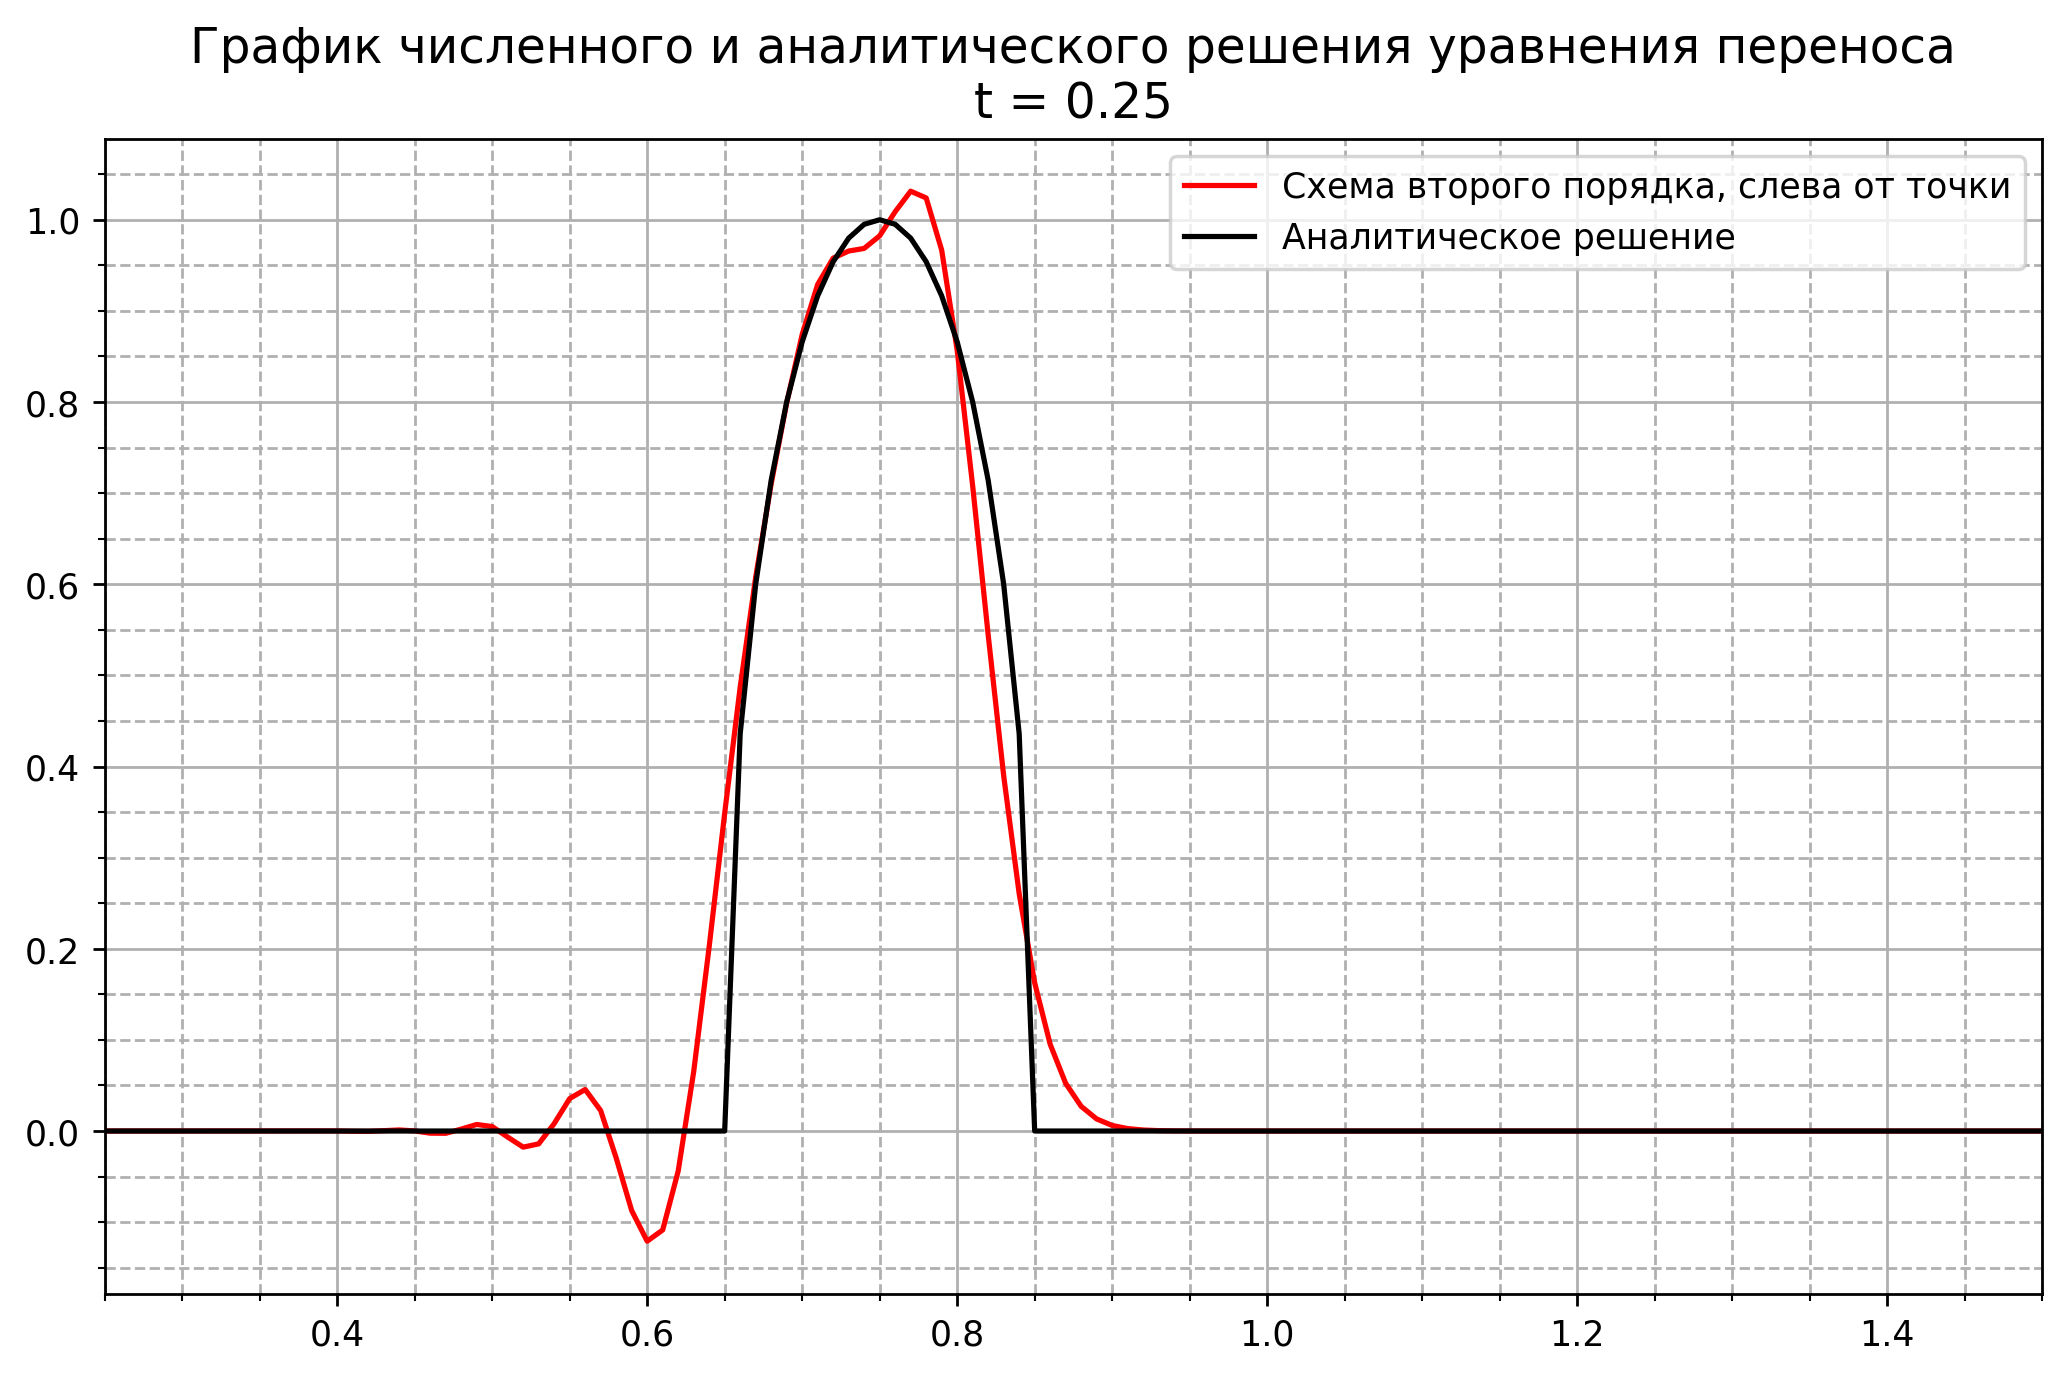

In [46]:
a1 = 27. / 30
a2 = 1. / 6
a3 = 0
a4 = -1. / 15 

solveTransfer([a1, a2, a3, a4], '2_ord_left', f'Схема второго порядка, слева от точки',)
print()

In [ ]:
a1 = 27. / 30
a2 = 1. / 6
a3 = 0
a4 = -1. / 15 

solveTransfer([a1, a2, a3, a4], '2_ord_left', 'Схема второго порядка, слева от точки',)
print()

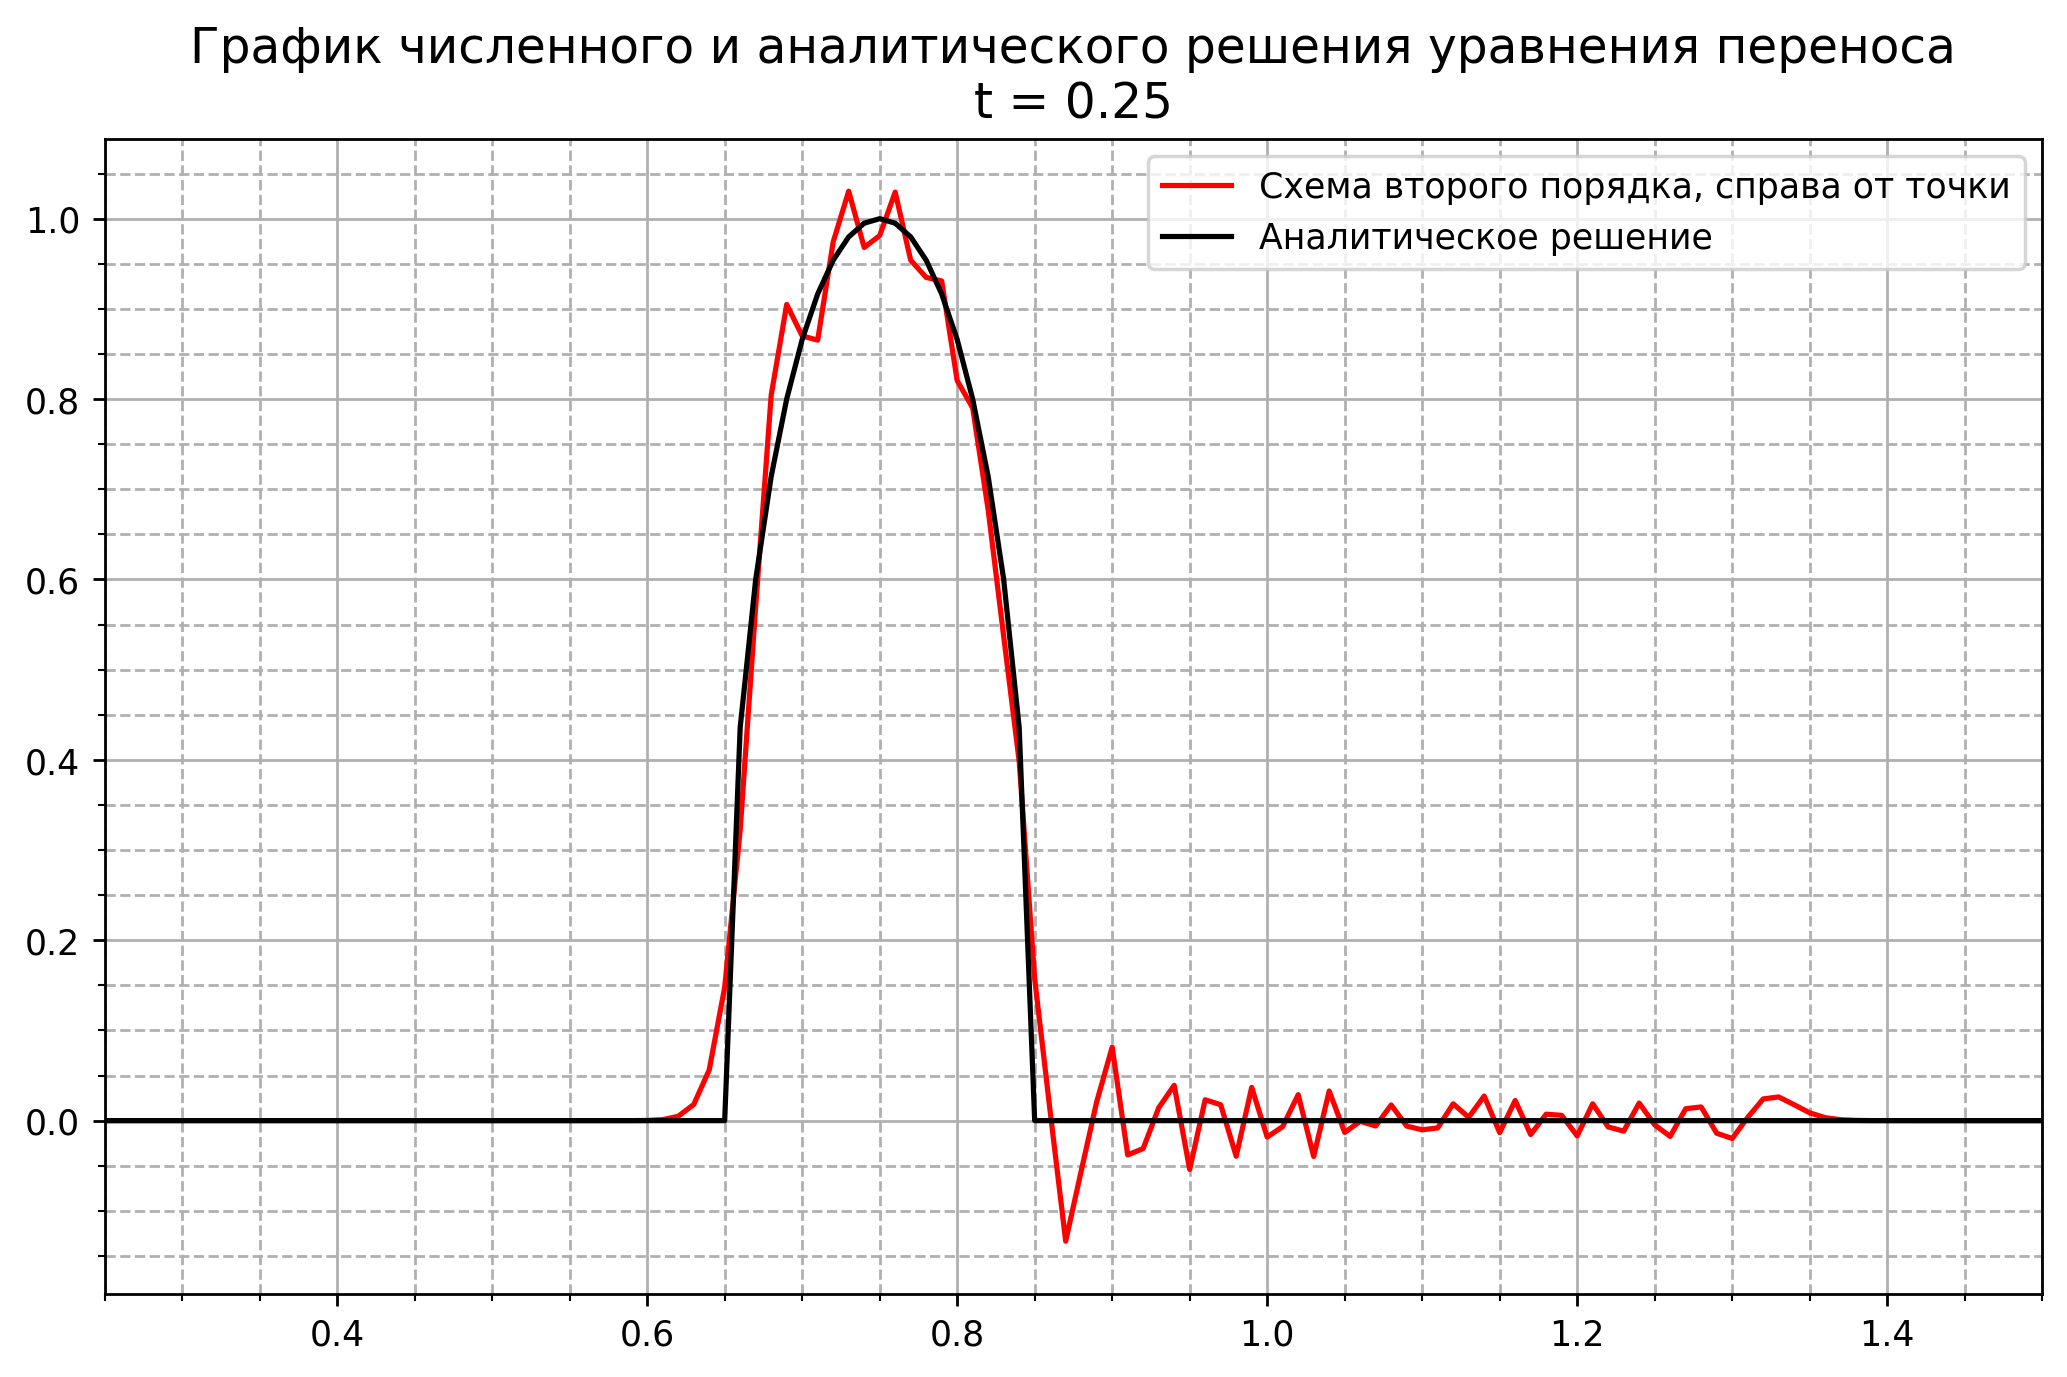

In [47]:
a1 = 0.5
a2 = -0.5
a3 = 1
a4 = 0 

solveTransfer([a1, a2, a3, a4], '2_ord_right', 'Схема второго порядка, справа от точки',)
print()

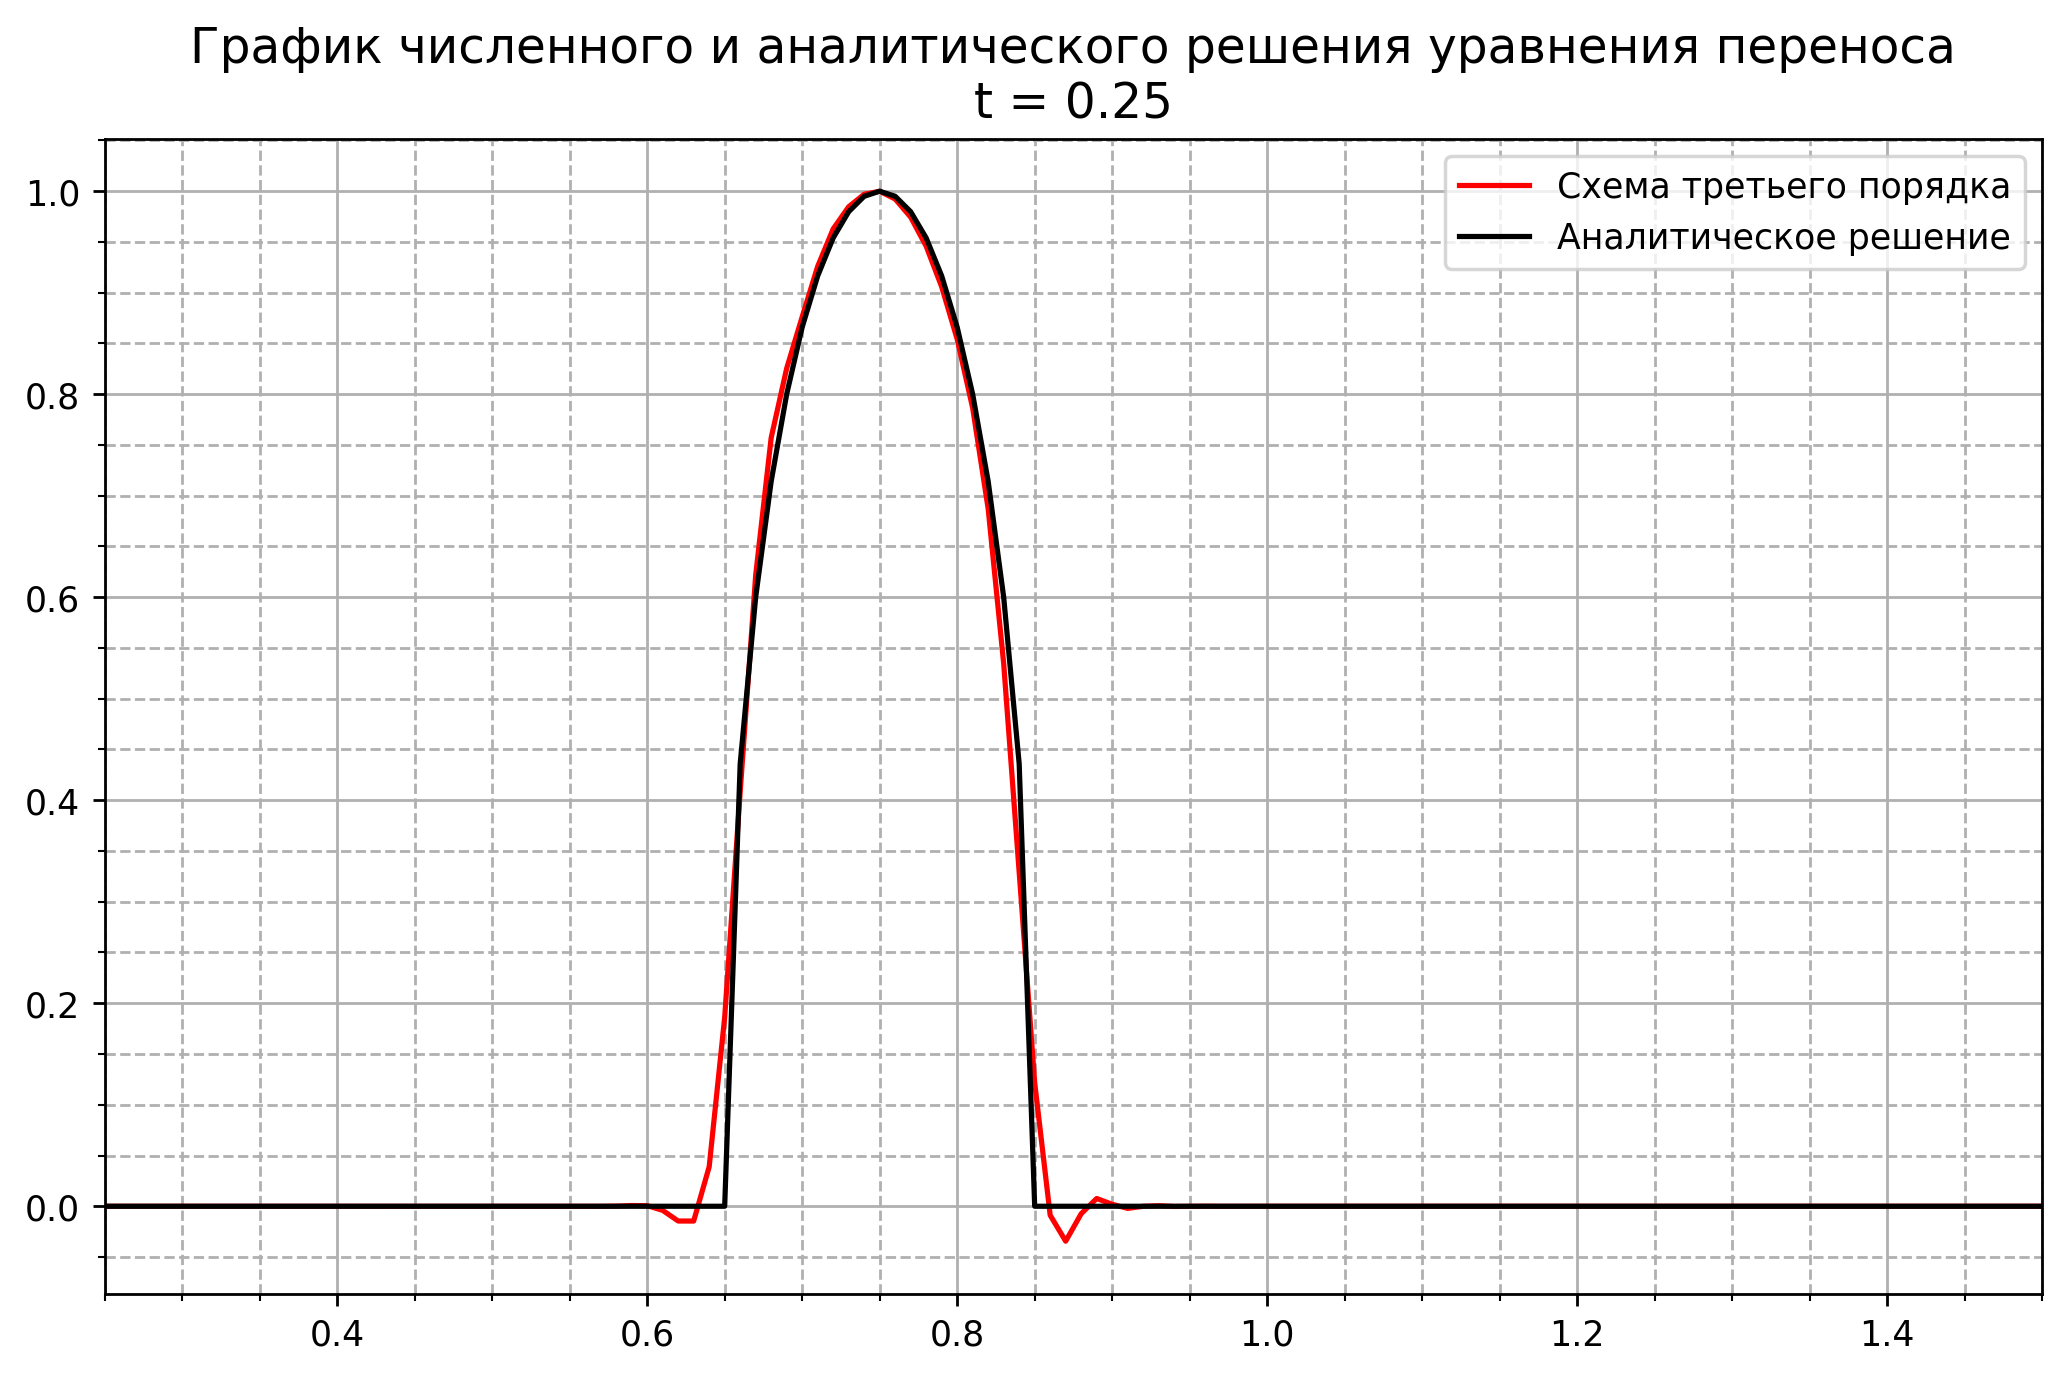

In [48]:
a1 = 3. / 5
a2 = -1. / 3
a3 = 3. / 4
a4 = - 1. / 60

solveTransfer([a1, a2, a3, a4], '3_ord_right', 'Схема третьего порядка',)
print()